# 서울시 따릉이 대여량 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 데이터 확인하기

In [ ]:
# 데이터 불러오기
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ttareungyi/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ttareungyi/test.csv')

In [ ]:
# 데이터 개수 확인
print(train_df.shape)
print(test_df.shape)

(1459, 11)
(715, 10)


In [ ]:
# feature 값 확인 
print(train_df.columns)
print('-'*100)
print(test_df.columns)

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')
----------------------------------------------------------------------------------------------------
Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5'],
      dtype='object')


 서울시 마포구의 날짜별, 시간별 기상상황과 따릉이 대여 수 데이터


- id 고유 id
- hour 시간 - 시간대
- temperature 기온
- precipitation 비가 오지 않았으면 0, 비가 오면 1
- windspeed 풍속(평균)
- humidity 습도
- visibility 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
- ozone 오존
- pm10 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
- pm2.5 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
- count 시간에 따른 따릉이 대여 수


ozone, pm10, pm2.5는 높을수록 안 좋다

train 데이터의 count를 제외하고는 feature 모두 같다.

count값을 예측해야한다

In [ ]:
# 통계값 확인 
print(train_df.describe())

                id         hour  hour_bef_temperature  hour_bef_precipitation  \
count  1459.000000  1459.000000           1457.000000             1457.000000   
mean   1105.914325    11.493489             16.717433                0.031572   
std     631.338681     6.922790              5.239150                0.174917   
min       3.000000     0.000000              3.100000                0.000000   
25%     555.500000     5.500000             12.800000                0.000000   
50%    1115.000000    11.000000             16.600000                0.000000   
75%    1651.000000    17.500000             20.100000                0.000000   
max    2179.000000    23.000000             30.000000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count         1450.000000        1457.000000          1457.000000   
mean             2.479034          52.231297          1405.216884   
std              1.378265          20.370387           583.1317

In [ ]:
# null 값 확인
print(train_df.info())
print('-'*100)
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB
None
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [ ]:
# 결손값 개수 
print(train_df.isnull().sum())
print('-'*100)
print(test_df.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64
----------------------------------------------------------------------------------------------------
id                         0
hour                       0
hour_bef_temperature       1
hour_bef_precipitation     1
hour_bef_windspeed         1
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64


train, test 둘 다 id와 hour 값(count 제외)을 제외한 모든 feature에 결손값이 존재한다.


ozone, pm10, pm2.5를 제외한 나머지 데이터는 평균값으로 결손값을 채운다. 

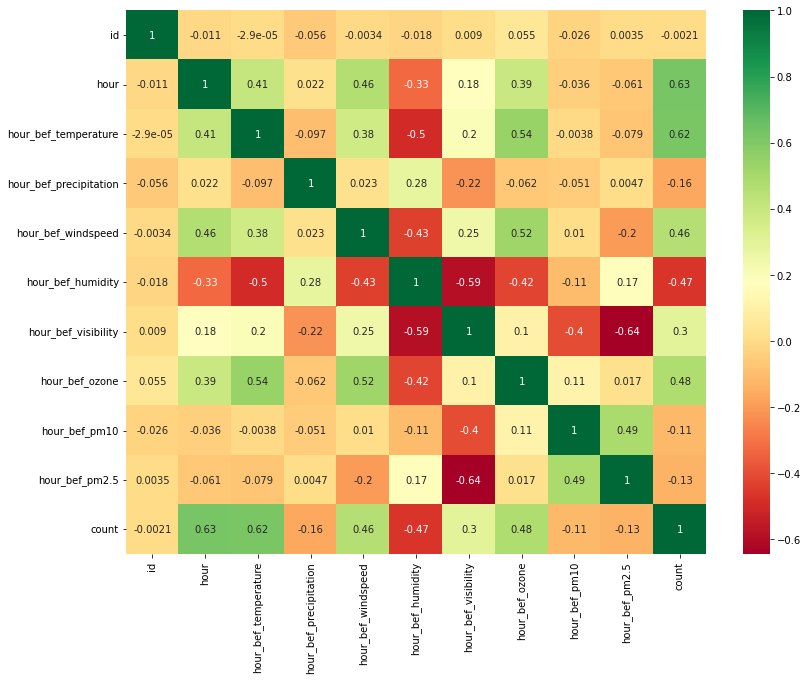

In [ ]:
# heatmap을 통해 상관 관계 확인

plt.figure(figsize=(13,10))
g = sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")


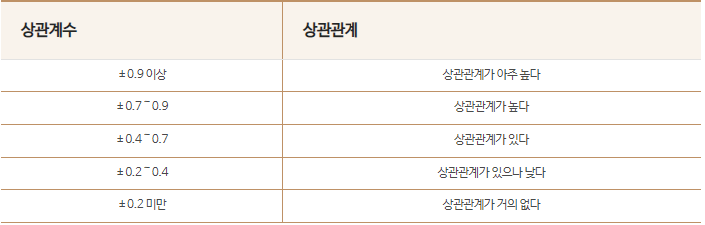

 상관계수가 +_0.4 이상이면 상관관계가 있다고 봄

hour, temperature, windspeed, humidity, ozone


또한 visibility와 pm수치의 상관관계가 크다. 

null 값을 넣을 때 이를 이용해 넣는 것이 좋을 듯하다.

## 2. 데이터 시각화

Text(0.5, 1.0, 'hour_count')

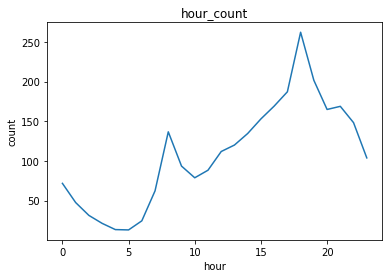

In [ ]:
# 시간대에 따른 따릉이 대여량
train_df.groupby('hour').mean()['count'].plot()
plt.ylabel('count')
plt.title('hour_count')

그래프를 보면 5-10시 사이 뾰족한 부분은 출근시간, 15-20시 뾰족한 부분은 퇴근시간으로 볼 수 있다. 

즉, 출퇴근 시간에 따릉이 대여량 급증하는 것으로 볼 수 있다. 

또한 사람들의 활동량이 많아지는 10시 이후부터 대여량이 증가하고 퇴근시간 이후로는 대여량이 감소하는 것을 볼 수 있다. 
 

미세먼지의 결측값은 visibility의 값과의 비율로 임의로 넣겠다. 

In [ ]:
# 각 feature의 비율 구하기(pm10, pm2.5, visiibility, ozone) -> 결측치를 이 비율로 넣을 거임 
def feature_per(feature_1 : str, feature_2 : str):
    # 모든 결측치가 있는 행을 제거하고 인덱스 복원
    train_and_test_dropna = [train_df.dropna().reset_index(drop=True), test_df.dropna().reset_index(drop=True)]
    per_list = []
    for dataset in train_and_test_dropna:
        # 각 index들의 feature끼리의 비율 
        for i in range(len(dataset)):
            f1 = dataset[feature_1][i]
            f2 = dataset[feature_2][i]
            per = f1 / f2
            per_list.append(per)
    # 각 비율들의 평균 
    mean_per = round(sum(per_list) / len(per_list), 4)
    return mean_per

pm2.5와 pm10은 visibility와 상관관계가 있음.

생각해보면 미세먼지가 높을수록 가시성이 안 좋음 

In [ ]:
# pm10과 visibility의 비율 
feature_per('hour_bef_pm10', 'hour_bef_visibility')

0.056

In [ ]:
# pm2.5와 visibility의 비율
# feature_per('hour_bef_pm2.5', 'hour_bef_visibility')
feature_per('hour_bef_pm2.5', 'hour_bef_pm10')


0.6071

오존의 농도는 기온과 풍속의 상관관계가 있다. 

오존과 기온의 상관관계가 더 높기 때문에 이 비율로 결손값을 채우겠다.

In [ ]:
# ozone과 temperature의 비율
feature_per('hour_bef_ozone', 'hour_bef_temperature')

0.0022

## 3. 결측치 채우기 

In [ ]:
# 데이터 합치기 
train_and_test = [train_df, test_df]

# 결측치 있는 행들만 보기
def fill_value(feature_1 : str, feature_2 : str):
    for dataset in train_and_test:
        # null 값이 있는 index 리스트
        null_index = dataset[dataset[feature_1].isnull()].index
        # 비율 값으로 null 값 채우기 
        for i in null_index:
            dataset[feature_1] = dataset[feature_2] * feature_per(feature_1, feature_2) 
    print(train_df.isnull().sum())

feature 값 중 temperature, precipitation, windspeed,humidity,visibility는 결측값이 적음 

-> feature는 평균으로 채움

In [ ]:
list = ['hour_bef_temperature', 'hour_bef_windspeed','hour_bef_humidity','hour_bef_visibility']

# null 개수 별로 없는 feature 채우기 
for dataset in train_and_test:
    for i in list:
        dataset[i].fillna(round(dataset[i].mean(),0), inplace=True)
        dataset['hour_bef_precipitation'].fillna(0, inplace=True)

In [ ]:
print(train_df.isnull().sum())

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64


In [ ]:
# pm10 값 채우기 
fill_value('hour_bef_pm10', 'hour_bef_visibility')

id                          0
hour                        0
hour_bef_temperature        0
hour_bef_precipitation      0
hour_bef_windspeed          0
hour_bef_humidity           0
hour_bef_visibility         0
hour_bef_ozone             76
hour_bef_pm10               0
hour_bef_pm2.5            117
count                       0
dtype: int64


In [ ]:
# pm2.5 값 채우기
# fill_value('hour_bef_pm2.5', 'hour_bef_visibility')
fill_value('hour_bef_pm2.5', 'hour_bef_pm10')

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         0
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            76
hour_bef_pm10              0
hour_bef_pm2.5             0
count                      0
dtype: int64


In [ ]:
fill_value('hour_bef_ozone', 'hour_bef_temperature')

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64


In [ ]:
print(train_df.head(30))

    id  hour  hour_bef_temperature  hour_bef_precipitation  \
0    3    20                  16.3                     1.0   
1    6    13                  20.1                     0.0   
2    7     6                  13.9                     0.0   
3    8    23                   8.1                     0.0   
4    9    18                  29.5                     0.0   
5   13     2                  13.6                     0.0   
6   14     3                  10.6                     0.0   
7   16    21                  16.0                     0.0   
8   19     9                  13.8                     0.0   
9   20    14                  17.2                     0.0   
10  21     4                   5.7                     0.0   
11  22    10                  15.4                     0.0   
12  24     9                  14.1                     0.0   
13  27    10                   9.2                     0.0   
14  28     1                  20.0                     0.0   
15  29  

## 4. 범주 분류

미세먼지 등급 조건 

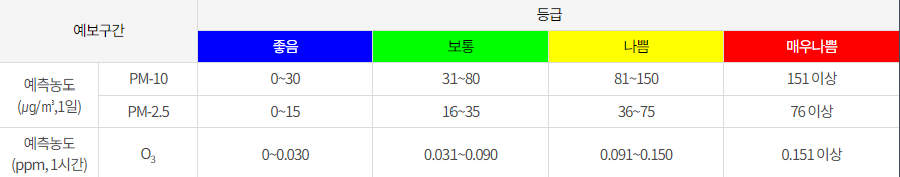

미세먼지, 오존을 등급 별로 나누어 보겠다

미세먼지(PM-10)

- 좋음(0) : 0 ~ 30
- 보통(1) : 31 ~ 80
- 나쁨(2) : 81 ~ 150
- 매우나쁨(3) : 151 ~ 

초미세먼지(PM-2.5)

- 좋음(0) : 0 ~ 15
- 보통(1) : 16 ~ 35
- 나쁨(2) : 36 ~ 75
- 매우나쁨(3) : 76 ~ 

오존
- 좋음(0) : 0 ~ 0.030
- 보통(1) : 0.031 ~ 0.090
- 나쁨(2) : 0.091 ~ 0.150
- 매우나쁨(3) : 0.151 ~ 


In [ ]:
# 미세먼지 pm10 등급 별로 나누기 

for dataset in train_and_test:
    dataset.loc[dataset['hour_bef_pm10'] <= 30, 'hour_bef_pm10'] = 0
    dataset.loc[(dataset['hour_bef_pm10'] > 30) & (dataset['hour_bef_pm10'] <= 80), 'hour_bef_pm10'] = 1
    dataset.loc[(dataset['hour_bef_pm10'] > 80) & (dataset['hour_bef_pm10'] <= 150), 'hour_bef_pm10'] = 2
    dataset.loc[(dataset['hour_bef_pm10'] > 150), 'hour_bef_pm10'] = 3

# train_df['hour_bef_pm10'].astype(int)
# test_df['hour_bef_pm10'].astype(int)

In [ ]:
# 미세먼지 pm2.5 등급 별로 나누기 

for dataset in train_and_test:
    dataset.loc[dataset['hour_bef_pm2.5'] <= 15, 'hour_bef_pm2.5'] = 0
    dataset.loc[(dataset['hour_bef_pm2.5'] > 15) & (dataset['hour_bef_pm2.5'] <= 35), 'hour_bef_pm2.5'] = 1
    dataset.loc[(dataset['hour_bef_pm2.5'] > 35) & (dataset['hour_bef_pm2.5'] <= 75), 'hour_bef_pm2.5'] = 2
    dataset.loc[(dataset['hour_bef_pm2.5'] > 75), 'hour_bef_pm2.5'] = 3
    
# train_df['hour_bef_pm2.5'].astype(int)
# test_df['hour_bef_pm2.5'].astype(int)

In [ ]:
# 오존 등급 별로 나누기
for dataset in train_and_test:
    dataset.loc[dataset['hour_bef_ozone'] <= 0.030, 'hour_bef_ozone'] = 0
    dataset.loc[(dataset['hour_bef_ozone'] > 0.030) & (dataset['hour_bef_ozone'] <= 0.090), 'hour_bef_ozone'] = 1
    dataset.loc[(dataset['hour_bef_ozone'] > 0.090) & (dataset['hour_bef_ozone'] <= 0.150), 'hour_bef_ozone'] = 2
    dataset.loc[(dataset['hour_bef_ozone'] > 0.151), 'hour_bef_ozone'] = 3

풍속 조건

- 고요 : 0 ~ 0.2
- 실바람 : 0.3 ~ 1.5
- 남실바람 : 1.6 ~ 3.3
- 산들 바람 : 3.4 ~ 5.4
- 적당한 산들 바람 : 5.5 ~ 7.9
- 신선한 바람 : 8.0 ~ 10.7
- 강한 바람 : 10.8 ~ 13.8
- 보통 강풍 : 13.9 ~ 17.1
- 신선한 강풍 : 17.2 ~ 20.7
- 강한 강풍 : 20.8 ~ 24.4
- 매우 강한 강풍 : 24.5 ~ 28.4
- 폭풍 : 28.5 ~ 32.6
- 허리케인 : 32.7 ~ 36.9

In [ ]:
# 풍속 등급 별로 나누기
for dataset in train_and_test:
    dataset.loc[dataset['hour_bef_windspeed'] <= 0.2, 'hour_bef_windspeed'] = 0
    dataset.loc[(dataset['hour_bef_windspeed'] > 0.2) & (dataset['hour_bef_windspeed'] <= 1.5), 'hour_bef_windspeed'] = 1
    dataset.loc[(dataset['hour_bef_windspeed'] > 1.5) & (dataset['hour_bef_windspeed'] <= 3.3), 'hour_bef_windspeed'] = 2
    dataset.loc[(dataset['hour_bef_windspeed'] > 3.3) & (dataset['hour_bef_windspeed'] <= 5.4), 'hour_bef_windspeed'] = 3
    dataset.loc[(dataset['hour_bef_windspeed'] > 5.4) & (dataset['hour_bef_windspeed'] <= 7.9), 'hour_bef_windspeed'] = 4
    dataset.loc[(dataset['hour_bef_windspeed'] > 7.9) & (dataset['hour_bef_windspeed'] <= 10.7), 'hour_bef_windspeed'] = 5
    dataset.loc[(dataset['hour_bef_windspeed'] > 10.7) & (dataset['hour_bef_windspeed'] <= 13.8), 'hour_bef_windspeed'] = 6
    dataset.loc[(dataset['hour_bef_windspeed'] > 13.8) & (dataset['hour_bef_windspeed'] <= 17.1), 'hour_bef_windspeed'] = 7
    dataset.loc[(dataset['hour_bef_windspeed'] > 17.1) & (dataset['hour_bef_windspeed'] <= 20.7), 'hour_bef_windspeed'] = 8
    dataset.loc[(dataset['hour_bef_windspeed'] > 20.7) & (dataset['hour_bef_windspeed'] <= 24.4), 'hour_bef_windspeed'] = 9
    dataset.loc[(dataset['hour_bef_windspeed'] > 24.4) & (dataset['hour_bef_windspeed'] <= 28.4), 'hour_bef_windspeed'] = 10
    dataset.loc[(dataset['hour_bef_windspeed'] > 28.4) & (dataset['hour_bef_windspeed'] <= 32.6), 'hour_bef_windspeed'] = 11
    dataset.loc[(dataset['hour_bef_windspeed'] > 32.6), 'hour_bef_windspeed'] = 12

불쾌지수

온도와 습도를 통해 불쾌지수를 구함

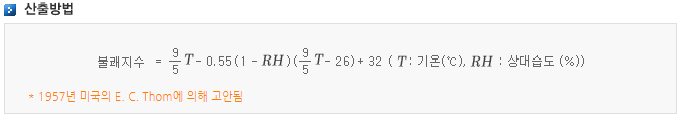

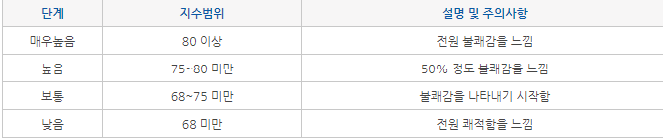

In [ ]:
# 불쾌지수 공식
def discomfort_index(temperature : float, humidity: int):
    result = (9/5) * temperature - 0.55 * (1-humidity/100) * ((9/5)*temperature - 26) + 32
    return round(result)

In [ ]:
# 불쾌지수 구하기 
for dataset in train_and_test:
    discomfort_list = []
    for i in range(len(dataset)):
         discomfort_list.append(discomfort_index(dataset['hour_bef_temperature'][i], dataset['hour_bef_humidity'][i]))
    dataset['discomfort_index'] = discomfort_list

In [ ]:
train_df['discomfort_index']

0       61
1       65
2       57
3       49
4       71
        ..
1454    61
1455    53
1456    63
1457    65
1458    66
Name: discomfort_index, Length: 1459, dtype: int64

In [ ]:
# # 불쾌지수 등급 별로 나누기 
# for dataset in train_and_test:
#     dataset.loc[dataset['discomfort_index'] < 68, 'discomfort_index'] = 0
#     dataset.loc[(dataset['discomfort_index'] >= 68) & (dataset['discomfort_index'] < 75), 'discomfort_index'] = 1
#     dataset.loc[(dataset['discomfort_index'] >= 75) & (dataset['discomfort_index'] < 80), 'discomfort_index'] = 2
#     dataset.loc[(dataset['discomfort_index'] >= 80), 'discomfort_index'] = 3

In [ ]:
train_df.info

<bound method DataFrame.info of         id  hour  hour_bef_temperature  hour_bef_precipitation  \
0        3    20                  16.3                     1.0   
1        6    13                  20.1                     0.0   
2        7     6                  13.9                     0.0   
3        8    23                   8.1                     0.0   
4        9    18                  29.5                     0.0   
...    ...   ...                   ...                     ...   
1454  2174     4                  16.8                     0.0   
1455  2175     3                  10.8                     0.0   
1456  2176     5                  18.3                     0.0   
1457  2178    21                  20.7                     0.0   
1458  2179    17                  21.1                     0.0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0                    1.5               89.0                576.0   
1                    1.4               

visibility(시정, 시계)를 등급 별로 나눠주기

500m씩 범위를 나눔




In [ ]:
# 시정거리 등급 별로 나누기 
for dataset in train_and_test:
    dataset.loc[dataset['hour_bef_visibility'] <= 500, 'hour_bef_visibility'] = 0
    dataset.loc[(dataset['hour_bef_visibility'] > 500) & (dataset['hour_bef_visibility'] <= 1000), 'hour_bef_visibility'] = 1
    dataset.loc[(dataset['hour_bef_visibility'] > 1000) & (dataset['hour_bef_visibility'] <= 1500), 'hour_bef_visibility'] = 2
    dataset.loc[(dataset['hour_bef_visibility'] > 1500) & (dataset['hour_bef_visibility'] <= 2000), 'hour_bef_visibility'] = 3

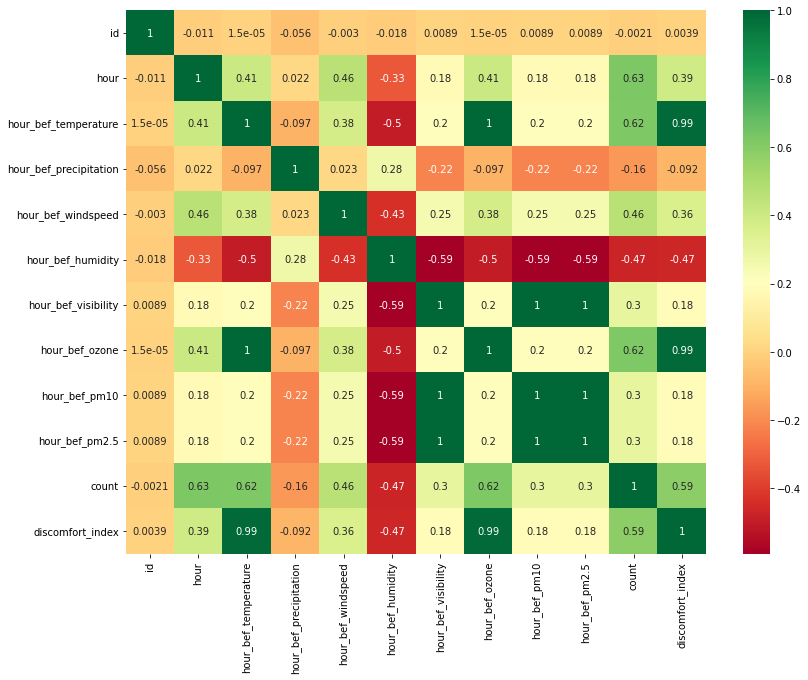

In [ ]:
plt.figure(figsize=(13,10))
g = sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")

In [ ]:
# 모든 데이터 타입을 int로 변환 

for dataset in train_and_test:
    for i in dataset.columns:
        dataset[i] = dataset[i].astype(int)

In [ ]:
train_df.info

<bound method DataFrame.info of         id  hour  hour_bef_temperature  hour_bef_precipitation  \
0        3    20                    16                       1   
1        6    13                    20                       0   
2        7     6                    13                       0   
3        8    23                     8                       0   
4        9    18                    29                       0   
...    ...   ...                   ...                     ...   
1454  2174     4                    16                       0   
1455  2175     3                    10                       0   
1456  2176     5                    18                       0   
1457  2178    21                    20                       0   
1458  2179    17                    21                       0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
0                      1                 89                  576   
1                      1               

In [ ]:
# 학습시 필요없는 feature drop 

train_df = train_df.drop(['id', 'hour_bef_visibility', 'hour_bef_precipitation'], axis=1)
test_df = test_df.drop(['id', 'hour_bef_visibility', 'hour_bef_precipitation'], axis=1)

In [ ]:
train_df = train_df.drop(['hour_bef_pm10', 'hour_bef_pm2.5', 'hour_bef_ozone'],axis=1)
test_df = test_df.drop(['hour_bef_pm10', 'hour_bef_pm2.5', 'hour_bef_ozone'],axis=1)

In [ ]:
train_df = train_df.drop(['hour_bef_humidity'],axis=1)
test_df = test_df.drop(['hour_bef_humidity'],axis=1)

In [ ]:
print(train_df)

        id  hour  hour_bef_temperature  hour_bef_precipitation  \
0        3    20                    16                       1   
1        6    13                    20                       0   
2        7     6                    13                       0   
3        8    23                     8                       0   
4        9    18                    29                       0   
...    ...   ...                   ...                     ...   
1454  2174     4                    16                       0   
1455  2175     3                    10                       0   
1456  2176     5                    18                       0   
1457  2178    21                    20                       0   
1458  2179    17                    21                       0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  count  \
0                      1                 89                  576     49   
1                      1                 48              

## 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train_scaled = scaler.fit_transform(train_df)

train_scaled_df = pd.DataFrame(train_scaled, columns = train_df.index)

ValueError: ignored

In [ ]:
print(train_df_scaled)

[[0.86956522 0.49070632 0.1875     ... 0.2591051  0.11162791 0.59459459]
 [0.56521739 0.63197026 0.175      ... 0.43600416 0.36744186 0.7027027 ]
 [0.26086957 0.40148699 0.0875     ... 0.67845994 0.05813953 0.48648649]
 ...
 [0.2173913  0.56505576 0.2375     ... 1.         0.04883721 0.64864865]
 [0.91304348 0.65427509 0.4625     ... 0.68522373 0.5        0.7027027 ]
 [0.73913043 0.66914498 0.3875     ... 0.98595213 0.39302326 0.72972973]]


## 모델에 넣을 데이터 준비

In [ ]:
# 목적 변수 제거
X_train = train_df.drop(["count"], axis=1)
#목적 변수 역할
Y_train = train_df["count"]
#예측 대상 데이터 셋
X_test  = test_df
X_train.shape, Y_train.shape, X_test.shape

((1459, 5), (1459,), (715, 5))

In [ ]:
print(X_train)
print(Y_train)
print(X_test)

      hour  hour_bef_temperature  hour_bef_windspeed  hour_bef_humidity  \
0       20                    16                   1                 89   
1       13                    20                   1                 48   
2        6                    13                   0                 79   
3       23                     8                   2                 54   
4       18                    29                   4                  7   
...    ...                   ...                 ...                ...   
1454     4                    16                   1                 53   
1455     3                    10                   3                 45   
1456     5                    18                   1                 54   
1457    21                    20                   3                 37   
1458    17                    21                   3                 47   

      discomfort_index  
0                   61  
1                   65  
2                   57  

## 모델 돌리기

In [ ]:
# model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression

In [ ]:
# LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)
y_hat = model.predict(X_train)
nmae = np.mean(abs(y_hat - Y_train) / Y_train) # nmae 계산

print(f'모델 NMAE: {nmae}')

모델 NMAE: 1.445731918699432


In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4.59

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
2     hour_bef_humidity     0.277468
3                 count     0.151550
1    hour_bef_windspeed     0.081298
0  hour_bef_temperature    -0.030161
4      discomfort_index    -0.143713

In [ ]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

2.12

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

32.49

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

2.06

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.52

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.52